# Robust peak detection algorithm using z-scores

An Algorithm which converts 2D-screen-coordinates from the poseNetModel(Copied from Debugger) to a Number of push ups done

In [17]:
test ="""0 = {Float@10373} 180.5
1 = {Float@10374} 180.0
2 = {Float@10375} 176.5
3 = {Float@10376} 175.5
4 = {Float@10377} 184.0
5 = {Float@10378} 174.0
6 = {Float@10379} 166.5
7 = {Float@10380} 165.0
8 = {Float@10381} 164.5
9 = {Float@10382} 165.0
10 = {Float@10383} 165.5
11 = {Float@10384} 163.5
12 = {Float@10385} 164.5
13 = {Float@10386} 163.5
14 = {Float@10387} 153.0
15 = {Float@10388} 125.0
16 = {Float@10389} 110.5
17 = {Float@10390} 94.5
18 = {Float@10391} 76.5
19 = {Float@10392} 54.0
20 = {Float@10393} 45.5
21 = {Float@10394} 42.5
22 = {Float@10395} 42.5
23 = {Float@10396} 43.0
24 = {Float@10397} 43.0
25 = {Float@10398} 43.5
26 = {Float@10399} 48.5
27 = {Float@10400} 65.0
28 = {Float@10401} 79.0
29 = {Float@10402} 97.5
30 = {Float@10403} 122.5
31 = {Float@10404} 135.0
32 = {Float@10405} 143.0
33 = {Float@10406} 157.0
34 = {Float@10407} 167.0
35 = {Float@10408} 162.0
36 = {Float@10409} 162.5
37 = {Float@10410} 164.5
38 = {Float@10411} 163.5
39 = {Float@10412} 143.5
40 = {Float@10413} 121.0
41 = {Float@10414} 99.5
42 = {Float@10415} 74.5
43 = {Float@10416} 50.5
44 = {Float@10417} 43.0
45 = {Float@10418} 41.0
46 = {Float@10419} 42.0
47 = {Float@10420} 43.0
48 = {Float@10421} 46.0
49 = {Float@10422} 53.0
50 = {Float@10423} 61.0
51 = {Float@10424} 79.0
52 = {Float@10425} 98.0
53 = {Float@10426} 114.0
54 = {Float@10427} 128.5
55 = {Float@10428} 136.0
56 = {Float@10429} 151.5
57 = {Float@10430} 161.5
58 = {Float@10431} 166.5
59 = {Float@10432} 163.5
60 = {Float@10433} 160.0
61 = {Float@10434} 133.0
62 = {Float@10435} 113.5
63 = {Float@10436} 94.5
64 = {Float@10437} 75.0
65 = {Float@10438} 63.5
66 = {Float@10439} 52.0
67 = {Float@10440} 44.5
68 = {Float@10441} 38.5
69 = {Float@10442} 31.5
70 = {Float@10443} 30.5
71 = {Float@10444} 31.0
72 = {Float@10445} 34.0
73 = {Float@10446} 33.0
74 = {Float@10447} 33.0
75 = {Float@10448} 31.0
76 = {Float@10449} 28.5
77 = {Float@10450} 10.0
78 = {Float@10451} -6.0
79 = {Float@10452} -4.0
80 = {Float@10453} -13.0
81 = {Float@10454} -9.0
82 = {Float@10455} -16.0
83 = {Float@10456} -11.5
84 = {Float@10457} -16.5
85 = {Float@10458} -10.5
86 = {Float@10459} -11.0
87 = {Float@10460} -16.0
88 = {Float@10461} -15.5
89 = {Float@10462} -10.5
90 = {Float@10463} -10.0
91 = {Float@10464} -13.5
92 = {Float@10465} -13.5
93 = {Float@10466} -14.5
94 = {Float@10467} -16.0
95 = {Float@10468} -16.0
96 = {Float@10469} -16.5
"""

In [18]:
linesplitted = test.split("\n")

In [43]:
linesplitted_clean = []

for line in linesplitted:
    if line != '':
        linesplitted_clean.append(float(line.split("} ")[1])* (-1))

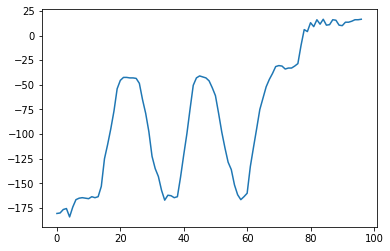

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(linesplitted_clean) # plotting by columns
plt.show()

In [27]:
import numpy as np

class real_time_peak_detection():
    def __init__(self, array, lag, threshold, influence):
        self.y = list(array)
        self.length = len(self.y)
        self.lag = lag
        self.threshold = threshold
        self.influence = influence
        self.signals = [0] * len(self.y)
        self.filteredY = np.array(self.y).tolist()
        self.avgFilter = [0] * len(self.y)
        self.stdFilter = [0] * len(self.y)
        self.avgFilter[self.lag - 1] = np.mean(self.y[0:self.lag]).tolist()
        self.stdFilter[self.lag - 1] = np.std(self.y[0:self.lag]).tolist()

    def thresholding_algo(self, new_value):
        self.y.append(new_value)
        i = len(self.y) - 1
        self.length = len(self.y)
        if i < self.lag:
            return 0
        elif i == self.lag:
            self.signals = [0] * len(self.y)
            self.filteredY = np.array(self.y).tolist()
            self.avgFilter = [0] * len(self.y)
            self.stdFilter = [0] * len(self.y)
            self.avgFilter[self.lag - 1] = np.mean(self.y[0:self.lag]).tolist()
            self.stdFilter[self.lag - 1] = np.std(self.y[0:self.lag]).tolist()
            return 0

        self.signals += [0]
        self.filteredY += [0]
        self.avgFilter += [0]
        self.stdFilter += [0]

        if abs(self.y[i] - self.avgFilter[i - 1]) > self.threshold * self.stdFilter[i - 1]:
            if self.y[i] > self.avgFilter[i - 1]:
                self.signals[i] = 1
            else:
                self.signals[i] = -1

            self.filteredY[i] = self.influence * self.y[i] + (1 - self.influence) * self.filteredY[i - 1]
            self.avgFilter[i] = np.mean(self.filteredY[(i - self.lag):i])
            self.stdFilter[i] = np.std(self.filteredY[(i - self.lag):i])
        else:
            self.signals[i] = 0
            self.filteredY[i] = self.y[i]
            self.avgFilter[i] = np.mean(self.filteredY[(i - self.lag):i])
            self.stdFilter[i] = np.std(self.filteredY[(i - self.lag):i])

        return self.signals[i]

In [40]:
startarr = [75]*10

In [56]:
ripdetection = real_time_peak_detection(startarr, 10, -75, 0.25)

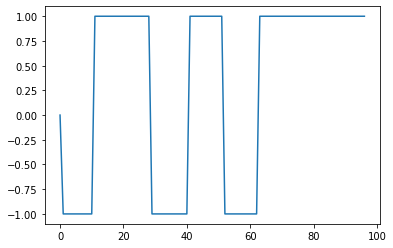

In [57]:
smoothed_signal = []
for value in linesplitted_clean:
    smoothed_signal.append(ripdetection.thresholding_algo(value))

plt.plot(smoothed_signal) # plotting by columns
plt.show()

In [70]:
##test smoothed from phone
phone_smoothed= """0 = {Integer@9049} 0
1 = {Integer@9050} -1
2 = {Integer@9050} -1
3 = {Integer@9050} -1
4 = {Integer@9050} -1
5 = {Integer@9050} -1
6 = {Integer@9050} -1
7 = {Integer@9050} -1
8 = {Integer@9050} -1
9 = {Integer@9050} -1
10 = {Integer@9051} 1
11 = {Integer@9051} 1
12 = {Integer@9051} 1
13 = {Integer@9051} 1
14 = {Integer@9051} 1
15 = {Integer@9051} 1
16 = {Integer@9051} 1
17 = {Integer@9050} -1
18 = {Integer@9050} -1
19 = {Integer@9050} -1
20 = {Integer@9050} -1
21 = {Integer@9050} -1
22 = {Integer@9050} -1
23 = {Integer@9050} -1
24 = {Integer@9050} -1
25 = {Integer@9050} -1
26 = {Integer@9050} -1
27 = {Integer@9050} -1
28 = {Integer@9051} 1
29 = {Integer@9051} 1
30 = {Integer@9051} 1
31 = {Integer@9051} 1
32 = {Integer@9051} 1
33 = {Integer@9051} 1
34 = {Integer@9051} 1
35 = {Integer@9051} 1
36 = {Integer@9051} 1
37 = {Integer@9051} 1
38 = {Integer@9051} 1
39 = {Integer@9050} -1
40 = {Integer@9050} -1
41 = {Integer@9050} -1
42 = {Integer@9050} -1
43 = {Integer@9050} -1
44 = {Integer@9050} -1
45 = {Integer@9051} 1
46 = {Integer@9051} 1
47 = {Integer@9051} 1
48 = {Integer@9051} 1
49 = {Integer@9051} 1
50 = {Integer@9051} 1
51 = {Integer@9051} 1
52 = {Integer@9051} 1
53 = {Integer@9051} 1
54 = {Integer@9051} 1
55 = {Integer@9050} -1
56 = {Integer@9050} -1
57 = {Integer@9050} -1
58 = {Integer@9050} -1
59 = {Integer@9050} -1
60 = {Integer@9050} -1
61 = {Integer@9051} 1
62 = {Integer@9051} 1
63 = {Integer@9051} 1
64 = {Integer@9051} 1
65 = {Integer@9051} 1
66 = {Integer@9051} 1
67 = {Integer@9051} 1
68 = {Integer@9051} 1
69 = {Integer@9051} 1
70 = {Integer@9051} 1
71 = {Integer@9051} 1
72 = {Integer@9051} 1
73 = {Integer@9051} 1
74 = {Integer@9051} 1
75 = {Integer@9051} 1
76 = {Integer@9051} 1
77 = {Integer@9051} 1
78 = {Integer@9051} 1
79 = {Integer@9051} 1
80 = {Integer@9051} 1
81 = {Integer@9051} 1
82 = {Integer@9051} 1
83 = {Integer@9051} 1
84 = {Integer@9051} 1
85 = {Integer@9051} 1
86 = {Integer@9051} 1
87 = {Integer@9051} 1"""

In [71]:
linesplitted = phone_smoothed.split("\n")

In [74]:
linesplitted_clean = []

for line in linesplitted:
    if line != '':
        linesplitted_clean.append(float(line.split("} ")[1]))

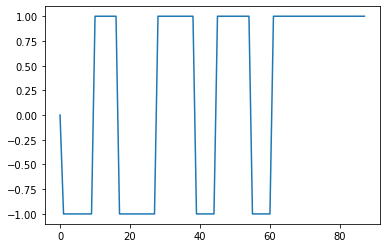

In [75]:
plt.plot(linesplitted_clean) # plotting by columns
plt.show()

In [67]:
test = [0,0,0]

In [68]:
test+= [0]

In [69]:
test

[0, 0, 0, 0]